In [128]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Here are the metrics I provide for campaigns

#Clickthrough Rate. 
#Open Rate. 
#Conversion Rate. ...
#Bounce Rate. ...
#List Growth Rate. ...
#Email Sharing/Forwarding Rate. ...
#Overall ROI. ...
#Unsubscribe Rate.

In [28]:
#pulling in data to dataframe

df = pd.read_csv('filtered_dataset.csv')


In [13]:
#checking data for any needed wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42099 entries, 0 to 42098
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               42099 non-null  int64         
 1   name                42099 non-null  object        
 2   account_number      42099 non-null  int64         
 3   email_name          42099 non-null  object        
 4   sent_date           42099 non-null  object        
 5   open_date           34832 non-null  datetime64[ns]
 6   click_date          8693 non-null   object        
 7   bounce_date         649 non-null    object        
 8   transaction_date    902 non-null    object        
 9   transaction_amount  889 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 3.2+ MB


In [29]:
#changing dtype for some columns

df = df.astype({'open_date':'datetime64', 'click_date':'datetime64', 
                'bounce_date':'datetime64', 'transaction_date':'datetime64', 
               'sent_date':'datetime64', 'name':'string', 'email_name':'string'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42099 entries, 0 to 42098
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               42099 non-null  int64         
 1   name                42099 non-null  string        
 2   account_number      42099 non-null  int64         
 3   email_name          42099 non-null  string        
 4   sent_date           42099 non-null  datetime64[ns]
 5   open_date           34832 non-null  datetime64[ns]
 6   click_date          8693 non-null   datetime64[ns]
 7   bounce_date         649 non-null    datetime64[ns]
 8   transaction_date    902 non-null    datetime64[ns]
 9   transaction_amount  889 non-null    float64       
dtypes: datetime64[ns](5), float64(1), int64(2), string(2)
memory usage: 3.2 MB


In [36]:
#the company sent 4 emails 
df['email_name'].unique()

<StringArray>
[                                'Email 1 - Welcome to Wanderlust Adventures',
                                     'Email 2 - Offers tailored just for you',
 'Email 3 - Don’t miss out on your next adventures, book now and get 20% off',
                        'Email 4 - Thanks for choosing Wanderlust Adventures']
Length: 4, dtype: string

In [39]:
# the emails were sent to the following number of recipients
df.groupby('email_name')['name'].count()

email_name
Email 1 - Welcome to Wanderlust Adventures                                    10750
Email 2 - Offers tailored just for you                                        14332
Email 3 - Don’t miss out on your next adventures, book now and get 20% off    10747
Email 4 - Thanks for choosing Wanderlust Adventures                            6270
Name: name, dtype: int64

In [157]:
#Creating functions to be used in analysis
#Clickthrough Rate. 
def ctr_calc_total(email):
    total_emails = len(df[df['email_name'].str.contains( email)])
    opened_emails = len(df[df['email_name'].str.contains( 'Email 1') & df['open_date'].isnull() == True])
    return opened_emails/total_emails

def ctr_calc_MoM(email, current_month_var):
    months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    current_month = months[current_month_var]
    total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month)])
    opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month)])
    
    prev_total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month - 1)])
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month -1)])
    return {'date':current_month_var, 'month':opened_emails/total_emails, 
            'previous_month':prev_opened_emails/prev_total_emails, 
           '% change': round(((opened_emails-prev_opened_emails)/prev_total_emails) * 100, 2)}

def ctr_calc_MoM_PY(email, current_month_var, current_year):
    months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    current_month = months[current_month_var]
    total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month) & (df['sent_date'].dt.year == current_year)] )
    opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month) & (df['sent_date'].dt.year == current_year) ])
    
    prev_total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month - 1) & (df['sent_date'].dt.year == current_year -1)])
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month -1) & (df['sent_date'].dt.year == current_year -1)])
    return {'Date': current_month_var + " " + str(current_year),  'current':opened_emails/total_emails, 'previous':prev_opened_emails/prev_total_emails}

def ctr_calc_YTD_PYTD(email):
    temp_date = pd.to_datetime(datetime.date.today())
    total_emails = len(df[df['email_name'].str.contains(email) & 
                          (df['sent_date'] <= temp_date)] )
    opened_emails = len(df[df['email_name'].str.contains(email) & 
                           (df['open_date'].isnull() == True) & 
                          (df['sent_date'] <= temp_date )  ])
    prev_total_emails = len(df[df['email_name'].str.contains(email) & 
                          (df['sent_date'] <= temp_date - relativedelta(years=1))] )
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & 
                           (df['open_date'].isnull() == True) & 
                          (df['sent_date'] <= temp_date - relativedelta(years=1))  ])
    return {'Date': datetime.date.today().year, 
            'current':opened_emails/total_emails, 
            'previous':prev_opened_emails/prev_total_emails}

In [158]:
ctr_calc_MoM('Email 2', 'April')

{'date': 'April',
 'month': 0.11015625,
 'previous_month': 0.1252072968490879,
 '% change': -0.83}

In [108]:
ctr_calc_MoM_PY('Email 2', 'April', 2022)

{'Date': 'April 2022',
 'current': 0.12962962962962962,
 'previous': 0.15447154471544716}

In [150]:
ctr_calc_YTD_PYTD("Email 3")

{'Date': 2023, 'current': 0.2269470549920908, 'previous': 0.22714029583146572}

In [126]:
ctr_calc_YTD_PYTD("Email 3")

2019-01-01 08:13:00 2023-08-31 19:24:00


In [42]:
df.name.nunique()

17916

In [44]:
print(df.sent_date.min(), df.sent_date.max())

2019-01-01 07:13:00 2023-08-31 23:22:00


In [132]:
print(df.sent_date.min() - relativedelta(years=2))

2017-01-01 07:13:00


In [196]:
#lets get the clickthrough rate

#we need the total number of unique clicks
clicked = df.groupby('email_name')['click_date'].nunique()

#then you need the count of emails sent
sent = df.groupby('email_name')['sent_date'].count()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} clickthrough rate: {}').format(i+1, round(clicked[i]/sent[i], 2)))

Email 1 clickthrough rate: 0.24
Email 2 clickthrough rate: 0.28
Email 3 clickthrough rate: 0.09
Email 4 clickthrough rate: 0.19


In [192]:
#to get the ope rate you need the count of sent emails
sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
opened =df.groupby('email_name')['open_date'].count()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} open rate: {}').format(i+1, round(opened[i]/sent[i], 2)))


Email 1 open rate: 0.85
Email 2 open rate: 0.88
Email 3 open rate: 0.77
Email 4 open rate: 0.77


In [169]:
df.open_date.value_counts()

2021-06-12 17:07:00    2
2019-09-13 17:07:00    2
2019-01-02 22:48:00    2
2022-04-19 03:29:00    2
2021-07-20 16:10:00    2
                      ..
2020-12-29 14:10:00    1
2021-04-12 15:17:00    1
2023-02-07 05:58:00    1
2020-11-03 04:36:00    1
2020-07-12 16:21:00    1
Name: open_date, Length: 34585, dtype: int64

In [207]:
#conversion rate

#There are some rows with no open or click, but a transaction date. We are not going to use these for conversion
# df[(df.transaction_amount.isnull() == True) & (df.transaction_date.isnull() == False )]

df_conv = df[~(df.transaction_amount.isnull() == True) & (df.transaction_date.isnull() == False )]

sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
converts =df_conv.groupby('email_name')['transaction_date'].nunique()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} conversion rate: {}').format(i+1, round(converts[i]/sent[i], 2)))


Email 1 conversion rate: 0.02
Email 2 conversion rate: 0.04
Email 3 conversion rate: 0.01
Email 4 conversion rate: 0.01


In [208]:
#Bounce rate


sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
bounce =df.groupby('email_name')['bounce_date'].nunique()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} bounce rate: {}').format(i+1, round(bounce[i]/sent[i], 2)))

Email 1 bounce rate: 0.02
Email 2 bounce rate: 0.02
Email 3 bounce rate: 0.02
Email 4 bounce rate: 0.01


name
Troy Long            2276.00
Ashley Fields        2214.98
Jessica Rivers       2182.44
Michelle Robinson    2061.90
Alicia Lynch         1930.10
                      ...   
Patricia Stewart      605.55
Cynthia Hall          605.46
Joshua Alvarez        604.24
Paul Allen            603.20
Laura Nelson DDS      601.92
Name: transaction_amount, Length: 881, dtype: float64


(array([204., 171., 185., 185., 128.,   1.,   2.,   1.,   1.,   3.]),
 array([ 601.92 ,  769.328,  936.736, 1104.144, 1271.552, 1438.96 ,
        1606.368, 1773.776, 1941.184, 2108.592, 2276.   ]),
 <a list of 10 Patch objects>)

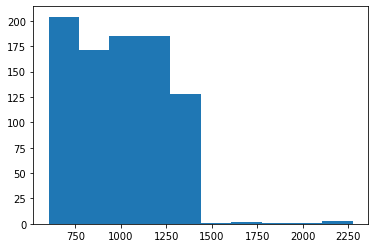

In [330]:
#now lets look at revenue related metrics

#revenue per user function

revbyuser = df[df.transaction_amount > 0].groupby('name')['transaction_amount'].sum().sort_values(ascending=False)
print(revbyuser)
plt.hist(revbyuser, bins=10)

In [215]:
#revenue by email 
df.groupby('email_name')['transaction_amount'].sum().sort_values(ascending=False)

email_name
Email 2 - Offers tailored just for you                                        531259.45
Email 1 - Welcome to Wanderlust Adventures                                    177967.20
Email 3 - Don’t miss out on your next adventures, book now and get 20% off    123289.49
Email 4 - Thanks for choosing Wanderlust Adventures                            45676.48
Name: transaction_amount, dtype: float64

In [ ]:
#dding columns for day, month and year separately
df['month'] = pd.DatetimeIndex(df['transaction_date']).month
df['year'] = pd.DatetimeIndex(df['transaction_date']).year
df['day'] = pd.DatetimeIndex(df['transaction_date']).day


year
2022.0    195747.89
2021.0    192115.66
2019.0    174246.71
2020.0    169313.80
2023.0    146768.56
Name: transaction_amount, dtype: float64


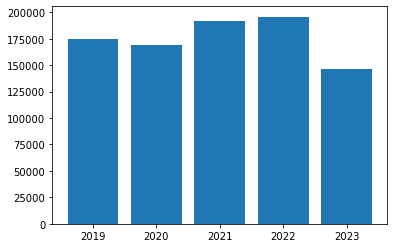

In [302]:
#revenue by year
rev_per_year = df.groupby('year')['transaction_amount'].sum().sort_values(ascending=False)
print(rev_per_year)
plt.bar(rev_per_year.keys(), rev_per_year)
plt.show()

month
7.0     92876.29
4.0     83891.35
8.0     83010.92
9.0     81612.32
5.0     78498.59
6.0     77294.71
3.0     72205.45
1.0     71708.87
10.0    69534.19
12.0    57929.24
2.0     55885.39
11.0    53745.30
Name: transaction_amount, dtype: float64


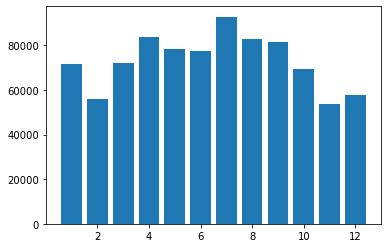

In [307]:
#revenue by month

rev_per_month = df.groupby('month')['transaction_amount'].sum().sort_values(ascending=False)
print(rev_per_month)
plt.bar(rev_per_month.keys(), rev_per_month)
plt.show()

In [310]:
#revenue per email by month
df.groupby(['year','month', 'email_name'])['transaction_amount'].sum()


year    month  email_name                                                                
2019.0  1.0    Email 1 - Welcome to Wanderlust Adventures                                      780.65
               Email 2 - Offers tailored just for you                                         3812.28
        2.0    Email 1 - Welcome to Wanderlust Adventures                                     1015.24
               Email 2 - Offers tailored just for you                                         5053.64
               Email 3 - Don’t miss out on your next adventures, book now and get 20% off     2544.37
                                                                                               ...   
2023.0  8.0    Email 2 - Offers tailored just for you                                        15794.64
               Email 3 - Don’t miss out on your next adventures, book now and get 20% off     4041.16
        9.0    Email 1 - Welcome to Wanderlust Adventures                                     

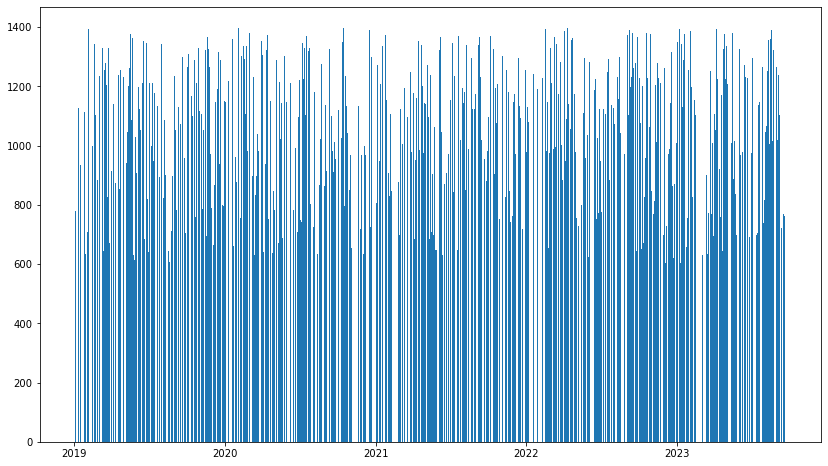

In [327]:
#revenue by day
rev_by_day = df.groupby('transaction_date')['transaction_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))

plt.bar(rev_by_day.keys(), rev_by_day, width=2)
plt.show()

In [274]:
df.head(20)

,index,name,account_number,email_name,sent_date,open_date,click_date,bounce_date,transaction_date,transaction_amount,month
0,0,Brian Harris,84256863,Email 1 - Welcome to Wanderlust Adventures,2021-11-11 22:24:00,2021-11-11 22:47:00,2021-11-11 22:51:00,NaT,NaT,NaN,NaN
1,4,Travis Gibson,87296226,Email 1 - Welcome to Wanderlust Adventures,2022-12-05 16:20:00,2022-12-05 16:25:00,NaT,NaT,NaT,NaN,NaN
2,8,Hector Hurst,14429475,Email 1 - Welcome to Wanderlust Adventures,2022-03-10 06:23:00,2022-03-10 07:13:00,NaT,NaT,NaT,NaN,NaN
3,12,Stephanie Scott,12583440,Email 1 - Welcome to Wanderlust Adventures,2022-07-05 15:10:00,2022-07-05 15:40:00,NaT,NaT,NaT,NaN,NaN
4,16,Hunter Jensen,46846333,Email 1 - Welcome to Wanderlust Adventures,2020-01-23 17:58:00,NaT,NaT,NaT,NaT,NaN,NaN
5,20,Timothy Hartman,94388384,Email 1 - Welcome to Wanderlust Adventures,2020-12-24 09:57:00,NaT,NaT,NaT,NaT,NaN,NaN
6,24,Jaime Lee,40286567,Email 1 - Welcome to Wanderlust Adventures,2020-04-25 11:28:00,NaT,NaT,NaT,NaT,NaN,NaN
7,28,Brian Chang,12419780,Email 1 - Welcome to Wanderlust Adventures,2020-01-16 18:46:00,2020-01-16 18:53:00,NaT,NaT,NaT,NaN,NaN
8,32,Edwin Hall,16545747,Email 1 - Welcome to Wanderlust Adventures,2023-08-08 01:52:00,2023-08-08 02:10:00,NaT,NaT,NaT,NaN,NaN
9,36,Donald Mccoy,94194334,Email 1 - Welcome to Wanderlust Adventures,2019-02-26 12:08:00,2019-02-26 12:38:00,NaT,NaT,NaT,NaN,NaN
